In [119]:
import StatsKit
import CSV
import StatsPlots
using DataFrames
using GLM 
using HypothesisTests
using Statistics

In [140]:
waterstocks = CSV.read("WaterStocks.csv")

,PERMNO,date,TICKER,COMNAM,PERMCO,BIDLO,ASKHI
,Int64,Int64,String,String,Int64,Float64,Float64
1,26463,19970102,CTWS,CONNECTICUT WATER SERVICE INC,1191,29.0,30.0
2,26463,19970103,CTWS,CONNECTICUT WATER SERVICE INC,1191,29.25,30.0
3,26463,19970106,CTWS,CONNECTICUT WATER SERVICE INC,1191,29.25,30.0
4,26463,19970107,CTWS,CONNECTICUT WATER SERVICE INC,1191,29.125,30.0
5,26463,19970108,CTWS,CONNECTICUT WATER SERVICE INC,1191,29.125,30.0
6,26463,19970109,CTWS,CONNECTICUT WATER SERVICE INC,1191,29.125,30.0
7,26463,19970110,CTWS,CONNECTICUT WATER SERVICE INC,1191,29.125,30.0
8,26463,19970113,CTWS,CONNECTICUT WATER SERVICE INC,1191,29.125,29.125
9,26463,19970114,CTWS,CONNECTICUT WATER SERVICE INC,1191,29.125,29.125


In [141]:
unique(waterstocks.TICKER)

5-element Vector{String}:
 "CTWS"
 "PSC"
 "WTR"
 "SCW"
 "AWR"

In [142]:
unique(waterstocks.PERMNO)

3-element Vector{Int64}:
 26463
 52898
 71475

In [147]:
AWRprices = waterstocks[waterstocks[:PERMNO] .== 71475, 8]
CTWSprices = waterstocks[waterstocks[:PERMNO] .== 26463, 8]
WTRprices = waterstocks[waterstocks[:PERMNO] .== 52898, 8];
#sort!(waterstocks, [:TICKER, :date])

In [149]:
logAWRprices = log.(abs.(AWRprices))
logWTRprices = log.(abs.(WTRprices))
logCTWSprices = log.(abs.(CTWSprices));

In [30]:
ΔlogAWRprices = diff(logAWRprices)
ΔlogWTRprices = diff(logWTRprices)
ΔlogCTWSprices = diff(logCTWSprices);

In [150]:
logAWRtest = ADFTest(logAWRprices, :none, 1)
#Panel 2A is reporting the ADF statistic

Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          2.22462e-5

Test summary:
    outcome with 95% confidence: fail to reject h_0
    p-value:                     0.7448

Details:
    sample size in regression:          3018
    number of lags:                     1
    ADF statistic:                      0.193496
    Critical values at 1%, 5%, and 10%: [-2.56648 -1.94109 -1.61673]


In [190]:
ΔlogAWRtest = ADFTest(ΔlogAWRprices, :none, 1)

Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          -1.09758

Test summary:
    outcome with 95% confidence: reject h_0
    p-value:                     <1e-99

Details:
    sample size in regression:          3017
    number of lags:                     1
    ADF statistic:                      -41.209
    Critical values at 1%, 5%, and 10%: [-2.56648 -1.94109 -1.61673]


In [191]:
logCTWStest = ADFTest(logCTWSprices, :none, 1)

Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          -4.54751e-5

Test summary:
    outcome with 95% confidence: fail to reject h_0
    p-value:                     0.5500

Details:
    sample size in regression:          3018
    number of lags:                     1
    ADF statistic:                      -0.366696
    Critical values at 1%, 5%, and 10%: [-2.56648 -1.94109 -1.61673]


In [194]:
ΔlogCTWStest = ADFTest(ΔlogCTWSprices, :none, 1)

Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          -1.31273

Test summary:
    outcome with 95% confidence: reject h_0
    p-value:                     <1e-99

Details:
    sample size in regression:          3017
    number of lags:                     1
    ADF statistic:                      -46.494
    Critical values at 1%, 5%, and 10%: [-2.56648 -1.94109 -1.61673]


In [196]:
logWTRtest = ADFTest(logWTRprices, :none, 1)

Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          -2.2914e-5

Test summary:
    outcome with 95% confidence: fail to reject h_0
    p-value:                     0.6217

Details:
    sample size in regression:          3018
    number of lags:                     1
    ADF statistic:                      -0.178815
    Critical values at 1%, 5%, and 10%: [-2.56648 -1.94109 -1.61673]


In [197]:
ΔlogWTRtest = ADFTest(ΔlogWTRprices, :none, 1)

Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          -1.04386

Test summary:
    outcome with 95% confidence: reject h_0
    p-value:                     <1e-99

Details:
    sample size in regression:          3017
    number of lags:                     1
    ADF statistic:                      -40.3894
    Critical values at 1%, 5%, and 10%: [-2.56648 -1.94109 -1.61673]


In [ ]:
#PANEL 2B:-------------------------------------------------------------------------------

In [156]:
#AWRprices = waterstocks[waterstocks[:TICKER] .== "AWR", 8]
#matchedCTWSprices = CTWSprices[CTWSprices[:date] .>= 20040120, 2]
#logmatchedCTWSprices = log.(abs.(matchedCTWSprices))

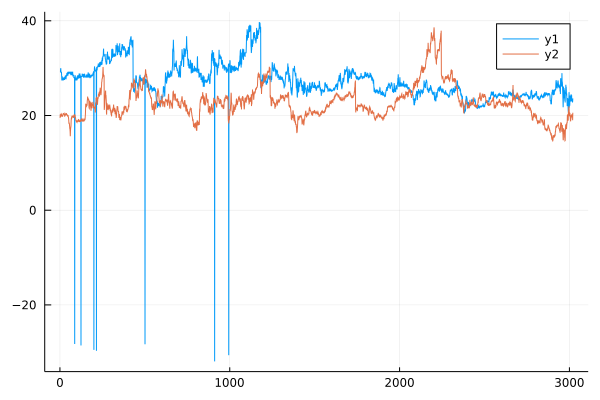

In [157]:
StatsPlots.plot(CTWSprices)
StatsPlots.plot!(WTRprices)

In [199]:
CTWS_WTRdata = DataFrame(CTWS = logCTWSprices, WTR = logWTRprices)

,CTWS,WTR
,Float64,Float64
1,3.37588,2.97041
2,3.37588,3.00815
3,3.37588,3.00196
4,3.39283,2.99573
5,3.4012,3.00196
6,3.3716,2.99573
7,3.3716,3.00196
8,3.3716,3.00196
9,3.3716,3.00815


In [200]:
#reg = GLM.lm(@formula(Y ~ X), data)
CTWS_WTRregression = GLM.lm(@formula(CTWS ~ WTR), CTWS_WTRdata)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

CTWS ~ 1 + WTR

Coefficients:
───────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error      t  Pr(>|t|)    Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────────
(Intercept)  3.23676     0.0474368  68.23    <1e-99   3.14375     3.32977
WTR          0.0207682   0.015205    1.37    0.1721  -0.00904498  0.0505814
───────────────────────────────────────────────────────────────────────────

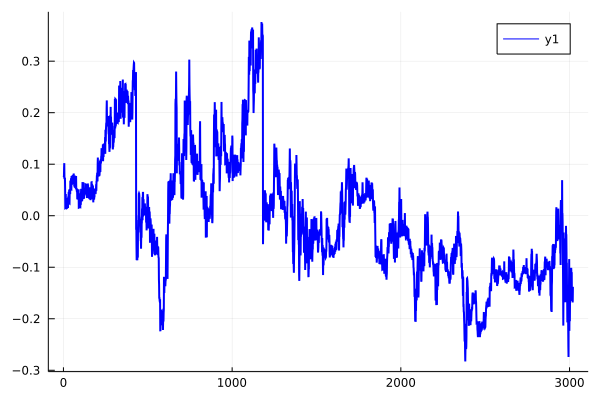

In [160]:
#StatsPlots.plot(ϵ̂, color="blue", lw=2.0, grid=true)
CTWS_WTRresiduals = residuals(CTWS_WTRregression)
StatsPlots.plot(CTWS_WTRresiduals, color="blue", lw=2.0, grid=true)

In [201]:
CTWS_WTRtest = ADFTest(CTWS_WTRresiduals, :none, 1)

Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          -0.0141299

Test summary:
    outcome with 95% confidence: reject h_0
    p-value:                     <1e-04

Details:
    sample size in regression:          3018
    number of lags:                     1
    ADF statistic:                      -4.1777
    Critical values at 1%, 5%, and 10%: [-2.56648 -1.94109 -1.61673]


In [74]:
#matchedAWR_CTWSprices = CTWSprices[CTWSprices[:date] .>= 19980701, 2]
#logAWRmatchedCTWSprices = log.(abs.(matchedAWR_CTWSprices));

In [202]:
CTWS_AWRdata = DataFrame(CTWS = logCTWSprices, AWR = logAWRprices);

In [203]:
CTWS_AWRregression = GLM.lm(@formula(CTWS ~ AWR), CTWS_AWRdata)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

CTWS ~ 1 + AWR

Coefficients:
──────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error       t  Pr(>|t|)  Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────────
(Intercept)   3.8018     0.0377452  100.72    <1e-99   3.72779    3.8758
AWR          -0.147809   0.0111333  -13.28    <1e-38  -0.169639  -0.125979
──────────────────────────────────────────────────────────────────────────

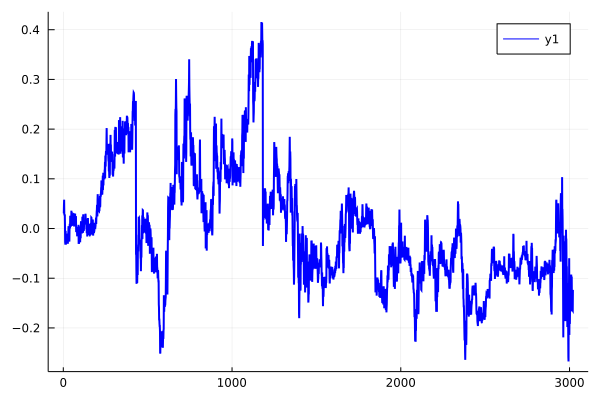

In [204]:
CTWS_AWRresiduals = residuals(CTWS_AWRregression)
StatsPlots.plot(CTWS_AWRresiduals, color="blue", lw=2.0, grid=true)

In [206]:
CTWS_AWRtest = ADFTest(CTWS_AWRresiduals, :none, 1)

Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          -0.0164517

Test summary:
    outcome with 95% confidence: reject h_0
    p-value:                     <1e-05

Details:
    sample size in regression:          3018
    number of lags:                     1
    ADF statistic:                      -4.52842
    Critical values at 1%, 5%, and 10%: [-2.56648 -1.94109 -1.61673]


In [82]:
#WTR on AWR
#matchedAWRprices = AWRprices[AWRprices[:date] .>= 20040120, 2]
#logmatchedAWRprices = log.(abs.(matchedAWRprices));

In [207]:
WTR_AWRdata = DataFrame(WTR = logWTRprices, AWR = logAWRprices);

In [208]:
WTR_AWRregression = GLM.lm(@formula(WTR ~ AWR), WTR_AWRdata)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

WTR ~ 1 + AWR

Coefficients:
────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────
(Intercept)  2.76716    0.0460353  60.11    <1e-99  2.6769      2.85743
AWR          0.103194   0.0135785   7.60    <1e-13  0.0765696   0.129818
────────────────────────────────────────────────────────────────────────

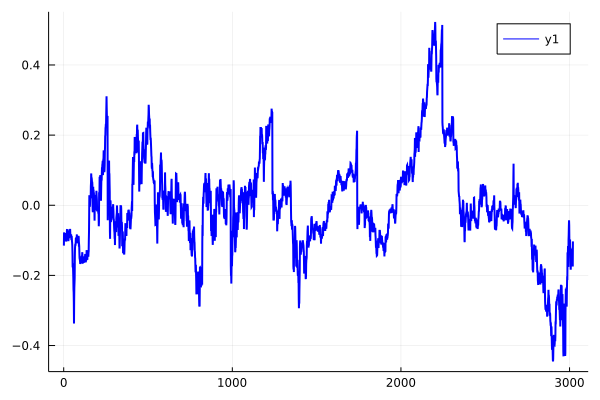

In [209]:
WTR_AWRresiduals = residuals(WTR_AWRregression)
StatsPlots.plot(WTR_AWRresiduals, color="blue", lw=2.0, grid=true)

In [210]:
WTR_AWRtest = ADFTest(WTR_AWRresiduals, :none, 1)
#the conclusion differs from in paper.

Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          -0.0111401

Test summary:
    outcome with 95% confidence: reject h_0
    p-value:                     <1e-04

Details:
    sample size in regression:          3018
    number of lags:                     1
    ADF statistic:                      -4.09053
    Critical values at 1%, 5%, and 10%: [-2.56648 -1.94109 -1.61673]


In [211]:
#CTWS on first differencing of CTWS and WTR

ΔlogCTWSprices = diff(logCTWSprices)
ΔlogWTRprices = diff(logWTRprices)
ΔlogAWRprices = diff(logAWRprices)
ΔΔlogCTWSprices = diff(ΔlogCTWSprices)
ΔΔlogWTRprices = diff(ΔlogWTRprices)
ΔΔlogAWRprices = diff(ΔlogAWRprices)
ΔCTWS_WTRresiduals = diff(CTWS_WTRresiduals)
ΔCTWS_AWRresiduals = diff(CTWS_AWRresiduals)
ΔWTR_AWRresiduals = diff(WTR_AWRresiduals)

3019-element Vector{Float64}:
  0.03774032798284743
 -0.006779970303163463
 -0.006230549750636083
  0.005064506491081033
 -0.006808667399873514
  0.007390042067132896
  0.0005846685922956674
  0.005025926988366347
 -0.006191970247921397
 -0.0073835643212665225
 -0.010259724376674662
  0.013758151963559229
 -0.0005913697014570118
  ⋮
  0.009527329712320398
  0.028164856088699786
  0.0038426994004958637
 -0.011712489112260194
 -0.006766031413500517
  0.005994770423545237
  0.005721874734339938
  0.004189094612917277
  0.0022974826014650063
 -0.00020316578630019677
 -0.04967135560760738
  0.07162050124026642

In [212]:
PanelA1 = DataFrame(CTWS = ΔlogCTWSprices[2:3019], ΔCTWS = ΔΔlogCTWSprices, ΔWTR = ΔΔlogWTRprices, Error = ΔCTWS_WTRresiduals[2:3019])
PanelA2 = DataFrame(WTR = ΔlogWTRprices[2:3019], ΔCTWS = ΔΔlogCTWSprices, ΔWTR = ΔΔlogWTRprices, Error = ΔCTWS_WTRresiduals[2:3019])
PanelB1 = DataFrame(WTR = ΔlogWTRprices[2:3019], ΔWTR = ΔΔlogWTRprices, ΔAWR = ΔΔlogAWRprices, Error = ΔWTR_AWRresiduals[2:3019])
PanelB2 = DataFrame(AWR = ΔlogAWRprices[2:3019], ΔWTR = ΔΔlogWTRprices, ΔAWR = ΔΔlogAWRprices, Error = ΔWTR_AWRresiduals[2:3019])
PanelC1 = DataFrame(CTWS = ΔlogCTWSprices[2:3019], ΔCTWS = ΔΔlogCTWSprices, ΔAWR = ΔΔlogAWRprices, Error = ΔCTWS_AWRresiduals[2:3019])
PanelC2 = DataFrame(AWR = ΔlogAWRprices[2:3019], ΔCTWS = ΔΔlogCTWSprices, ΔAWR = ΔΔlogAWRprices, Error = ΔCTWS_AWRresiduals[2:3019]);

In [214]:
#WTR_AWRregression = GLM.lm(@formula(WTR ~ AWR), WTR_AWRdata)
PanelA1regression = GLM.lm(@formula(CTWS ~ ΔCTWS + ΔWTR + Error), PanelA1)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

CTWS ~ 1 + ΔCTWS + ΔWTR + Error

Coefficients:
──────────────────────────────────────────────────────────────────────────────────
                   Coef.   Std. Error        t  Pr(>|t|)    Lower 95%    Upper 95%
──────────────────────────────────────────────────────────────────────────────────
(Intercept)   2.24573e-7  5.78156e-6      0.04    0.9690  -1.11116e-5   1.15608e-5
ΔCTWS        -0.00182434  0.00025844     -7.06    <1e-11  -0.00233108  -0.00131761
ΔWTR          0.0104291   0.000187921    55.50    <1e-99   0.0100606    0.0107976
Error         1.00337     0.000401259  2500.56    <1e-99   1.00258      1.00416
──────────────────────────────────────────────────────────────────────────────────

In [185]:
PanelA2regression = GLM.lm(@formula(WTR ~ ΔCTWS + ΔWTR+ Error), PanelA2)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

WTR ~ 1 + ΔCTWS + ΔWTR + Error

Coefficients:
──────────────────────────────────────────────────────────────────────────────────
                   Coef.   Std. Error      t  Pr(>|t|)     Lower 95%     Upper 95%
──────────────────────────────────────────────────────────────────────────────────
(Intercept)   1.08133e-5  0.000278385   0.04    0.9690  -0.000535031   0.000556658
ΔCTWS        -0.0878431   0.012444     -7.06    <1e-11  -0.112243     -0.0634435
ΔWTR          0.502167    0.00904847   55.50    <1e-99   0.484425      0.519908
Error         0.162299    0.0193208     8.40    <1e-16   0.124416      0.200183
──────────────────────────────────────────────────────────────────────────────────

In [186]:
PanelB1regression = GLM.lm(@formula(WTR ~ ΔWTR + ΔAWR + Error), PanelB1)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

WTR ~ 1 + ΔWTR + ΔAWR + Error

Coefficients:
─────────────────────────────────────────────────────────────────────────────────
                   Coef.   Std. Error       t  Pr(>|t|)    Lower 95%    Upper 95%
─────────────────────────────────────────────────────────────────────────────────
(Intercept)   1.28334e-5  2.70492e-5     0.47    0.6352  -4.02034e-5   6.58701e-5
ΔWTR         -0.00806729  0.00127373    -6.33    <1e-09  -0.0105648   -0.00556981
ΔAWR          0.0525256   0.000904477   58.07    <1e-99   0.0507521    0.054299
Error         1.01836     0.00178997   568.92    <1e-99   1.01485      1.02187
─────────────────────────────────────────────────────────────────────────────────

In [187]:
PanelB2regression = GLM.lm(@formula(AWR ~ ΔWTR + ΔAWR + Error), PanelB2)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

AWR ~ 1 + ΔWTR + ΔAWR + Error

Coefficients:
───────────────────────────────────────────────────────────────────────────────────
                    Coef.   Std. Error      t  Pr(>|t|)     Lower 95%     Upper 95%
───────────────────────────────────────────────────────────────────────────────────
(Intercept)   0.000124362  0.000262121   0.47    0.6352  -0.000389591   0.000638315
ΔWTR         -0.0781761    0.0123431    -6.33    <1e-09  -0.102378     -0.0539743
ΔAWR          0.509        0.00876485   58.07    <1e-99   0.491814      0.526186
Error         0.177878     0.0173457    10.25    <1e-23   0.143867      0.211889
───────────────────────────────────────────────────────────────────────────────────

In [188]:
PanelC1regression = GLM.lm(@formula(CTWS ~ ΔCTWS + ΔAWR + Error), PanelC1)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

CTWS ~ 1 + ΔCTWS + ΔAWR + Error

Coefficients:
────────────────────────────────────────────────────────────────────────────────
                   Coef.  Std. Error       t  Pr(>|t|)    Lower 95%    Upper 95%
────────────────────────────────────────────────────────────────────────────────
(Intercept)  -2.10321e-5  3.67239e-5   -0.57    0.5669  -9.30386e-5   5.09744e-5
ΔCTWS         0.0256826   0.00160799   15.97    <1e-54   0.0225298    0.0288355
ΔAWR         -0.0702945   0.0012135   -57.93    <1e-99  -0.0726739   -0.0679151
Error         0.947904    0.00243057  389.99    <1e-99   0.943138     0.95267
────────────────────────────────────────────────────────────────────────────────

In [189]:
PanelC2regression = GLM.lm(@formula(AWR ~ ΔCTWS + ΔAWR + Error), PanelC2)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

AWR ~ 1 + ΔCTWS + ΔAWR + Error

Coefficients:
────────────────────────────────────────────────────────────────────────────────────
                    Coef.   Std. Error       t  Pr(>|t|)     Lower 95%     Upper 95%
────────────────────────────────────────────────────────────────────────────────────
(Intercept)   0.000142293  0.000248455    0.57    0.5669  -0.000344867   0.000629452
ΔCTWS        -0.173756     0.0108789    -15.97    <1e-54  -0.195086     -0.152425
ΔAWR          0.475577     0.0082099     57.93    <1e-99   0.459479      0.491674
Error         0.352456     0.016444      21.43    <1e-94   0.320214      0.384699
────────────────────────────────────────────────────────────────────────────────────